In [174]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

# load my own module
from helper import logistic_regression as lr  
from helper import general as general

In [175]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# visualize data

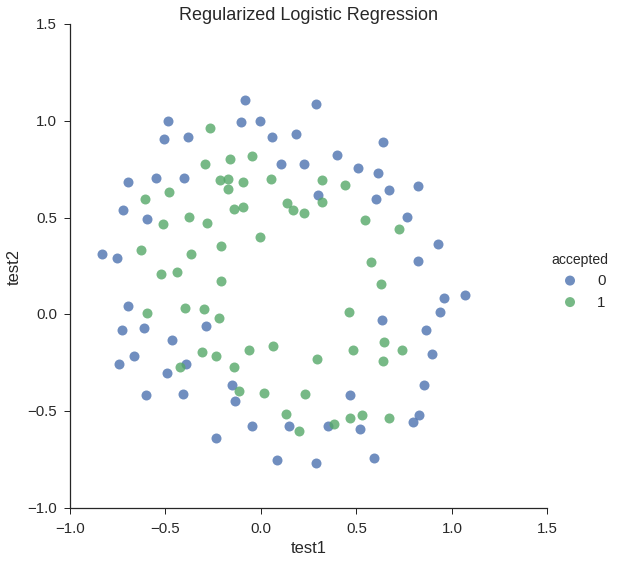

In [176]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=8, 
           fit_reg=False, 
           scatter_kws={"s": 100}
          )

plt.title('Regularized Logistic Regression')

# feature mapping

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```

In [177]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [178]:
data = lr.feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f01,f02,f03,f04,f05,f06,f10,f11,f12,...,f30,f31,f32,f33,f40,f41,f42,f50,f51,f60
0,1.0,0.69956,0.489384,0.342354,0.239497,0.167542,0.117206,0.051267,0.035864,0.025089,...,0.000135,0.000094,0.000066,0.000046,0.000007,0.000005,0.000003,3.541519e-07,2.477505e-07,1.815630e-08
1,1.0,0.68494,0.469143,0.321335,0.220095,0.150752,0.103256,-0.092742,-0.063523,-0.043509,...,-0.000798,-0.000546,-0.000374,-0.000256,0.000074,0.000051,0.000035,-6.860919e-06,-4.699318e-06,6.362953e-07
2,1.0,0.69225,0.479210,0.331733,0.229642,0.158970,0.110047,-0.213710,-0.147941,-0.102412,...,-0.009761,-0.006757,-0.004677,-0.003238,0.002086,0.001444,0.001000,-4.457837e-04,-3.085938e-04,9.526844e-05
3,1.0,0.50219,0.252195,0.126650,0.063602,0.031940,0.016040,-0.375000,-0.188321,-0.094573,...,-0.052734,-0.026483,-0.013299,-0.006679,0.019775,0.009931,0.004987,-7.415771e-03,-3.724126e-03,2.780914e-03
4,1.0,0.46564,0.216821,0.100960,0.047011,0.021890,0.010193,-0.513250,-0.238990,-0.111283,...,-0.135203,-0.062956,-0.029315,-0.013650,0.069393,0.032312,0.015046,-3.561597e-02,-1.658422e-02,1.827990e-02


# regularized cost
![](../img/reg_cost.png)

In [179]:
theta = np.zeros(data.shape[1])
X = lr.feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = general.get_y(df)
print(y.shape)

(118, 28)
(118,)


In [180]:
lr.regularized_cost(theta, X, y, l=1)

0.6931471805599454

this is the same as the not regularized cost because we init theta as zeros...

# regularized gradient
![](../img/reg_gradient.png)

In [181]:
lr.regularized_gradient(theta, X, y)

array([  8.47457627e-03,   7.77711864e-05,   3.76648474e-02,
         2.34764889e-02,   3.93028171e-02,   3.10079849e-02,
         3.87936363e-02,   1.87880932e-02,   1.15013308e-02,
         8.19244468e-03,   3.09593720e-03,   4.47629067e-03,
         1.37646175e-03,   5.03446395e-02,   7.32393391e-03,
         1.28600503e-02,   5.83822078e-03,   7.26504316e-03,
         1.83559872e-02,   2.23923907e-03,   3.38643902e-03,
         4.08503006e-04,   3.93486234e-02,   4.32983232e-03,
         6.31570797e-03,   1.99707467e-02,   1.09740238e-03,
         3.10312442e-02])

# fit the parameters

In [182]:
import scipy.optimize as opt

In [196]:
print('init cost = {}'.format(lr.regularized_cost(theta, X, y)))

res = opt.minimize(fun=lr.regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297128032
     jac: array([  1.21715281e-07,   8.28608238e-08,   4.33264464e-08,
         7.14607751e-09,  -1.95796824e-08,  -4.80293320e-09,
         1.29548304e-08,  -8.66022925e-09,  -1.11692835e-08,
         2.44548549e-09,   5.97159799e-09,  -3.10175481e-09,
         2.84088139e-09,   3.68493808e-08,   2.44239121e-09,
         1.38623362e-09,   1.30580781e-09,  -2.07975693e-10,
        -2.03184463e-09,  -4.75280011e-09,   3.06506937e-10,
         6.83218269e-10,   2.06530132e-08,   2.83727034e-10,
         3.70483493e-09,   3.98612695e-09,  -2.46467884e-09,
         7.81200474e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 66
  status: 0
 success: True
       x: array([ 1.2727394 ,  1.18109077, -1.43166316, -0.17513213, -1.19281993,
       -0.45635881, -0.92465134,  0.62527173, -0.91742446, -0.35723923,
       -0.27470558, -0.29537848, -0.14388666, -2.01996079, -0.36553541,
       -0.61555568, -0.27778476, -

# predict

In [197]:
final_theta = res.x
y_pred = lr.predict(X, final_theta)
accuracy = np.mean(y_pred == y)

print(accuracy)

0.830508474576
